In [3]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# used to supress display of warnings
import warnings
from IPython.display import clear_output
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import random, copy, math, time
import pandas as pd
import pickle

In [4]:
# suppress display of warnings
warnings.filterwarnings('ignore')

## Skip the code below and run the cells follwing the next heading

In [3]:
import os
source_dir=r"D:\Users\DELL\Desktop\Major Project\AT&T Face Rec\at&t_dataset"

In [4]:
class IdentityMetadata():
    def __init__(self, base, name, file):
        self.base = base
        # identity name
        self.name = name
        # image file name
        self.file = file

    def __repr__(self):
        return self.image_path()

    def image_path(self):
        return os.path.join(self.base, self.name, self.file)

def load_metadata(path):
    metadata = []
    for i in os.listdir(path)[1:]:
        for f in os.listdir(os.path.join(path, i)):
            # Check file extension. Allow only jpg/jpeg' files.
            ext = os.path.splitext(f)[1]
            if ext == '.pgm':
                metadata.append(IdentityMetadata(path, i, f))
    return np.array(metadata)

# metadata = load_metadata('images')
metadata = load_metadata(source_dir)

In [5]:
print('metadata shape :', metadata.shape)

metadata shape : (400,)


In [6]:
metadata[235]

D:\Users\DELL\Desktop\Major Project\AT&T Face Rec\at&t_dataset\s30\5.pgm

In [7]:
type(metadata[150]), metadata[150].image_path()

(__main__.IdentityMetadata,
 'D:\\Users\\DELL\\Desktop\\Major Project\\AT&T Face Rec\\at&t_dataset\\s23\\1.pgm')

In [8]:
import cv2
def load_image(path):
    img = cv2.imread(path, 1)
    # OpenCV loads images with color channels
    # in BGR order. So we need to reverse them
    return img[...,::-1]

In [9]:
im = load_image('D:\\Users\\DELL\\Desktop\\Major Project\\AT&T Face Rec\\at&t_dataset\\s23\\1.pgm')

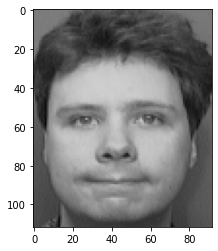

In [10]:
plt.imshow(im)

In [11]:
from tensorflow.keras.models import load_model
vgg_face_embedder = load_model(r"D:\Users\DELL\Desktop\Major Project\Github Face Rec\models-utilities\vgg_face_embedder.h5")

In [ ]:
embeddings = np.zeros((metadata.shape[0], 2622))
labels = []
for i, m in enumerate(metadata):
    img_path = metadata[i].image_path()
    img = load_image(img_path)
    img = (img / 255.).astype(np.float32)
    img = cv2.resize(img, dsize = (224,224))
    embedding_vector = vgg_face_embedder.predict(np.expand_dims(img, axis=0),verbose=0)[0]
    embeddings[i]=embedding_vector
    labels.append(metadata[i].name)
    clear_output(wait=True)
    print(i)

15


In [ ]:
with open("at&t_embds_400.pkl","wb") as f:
    pickle.dump([metadata,embeddings],f)

## Start From Here if not running for first time

In [5]:
from utils import *

In [6]:
with open("at&t_embds_400.pkl","rb") as f:
    metadata_att, embeddings_att = pickle.load(f)

In [7]:
f.close()

In [8]:
type(embeddings_att)

numpy.ndarray

In [9]:
x = embeddings_att

In [10]:
x.shape

(400, 2622)

In [11]:
y = np.array([m.name for m in metadata_att])

In [12]:
y.shape

(400,)

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.4, stratify = y)

In [15]:
pd.Series(y_train).value_counts()

s32    6
s1     6
s38    6
s23    6
s27    6
s18    6
s20    6
s29    6
s16    6
s40    6
s4     6
s6     6
s34    6
s14    6
s39    6
s36    6
s10    6
s7     6
s21    6
s33    6
s35    6
s31    6
s2     6
s25    6
s5     6
s11    6
s15    6
s17    6
s37    6
s28    6
s24    6
s12    6
s8     6
s19    6
s9     6
s22    6
s13    6
s3     6
s26    6
s30    6
dtype: int64

In [16]:
len(np.unique(y_train))

40

In [17]:
len(np.unique(y_test))

40

In [18]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)

In [19]:
x_test_std = scaler.transform(x_test)

In [20]:
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

In [21]:
print(le.classes_)
y_test_encoded = le.transform(y_test)

['s1' 's10' 's11' 's12' 's13' 's14' 's15' 's16' 's17' 's18' 's19' 's2'
 's20' 's21' 's22' 's23' 's24' 's25' 's26' 's27' 's28' 's29' 's3' 's30'
 's31' 's32' 's33' 's34' 's35' 's36' 's37' 's38' 's39' 's4' 's40' 's5'
 's6' 's7' 's8' 's9']


In [22]:
print('y_train_encoded : ', y_train_encoded)
print('y_test_encoded : ', y_test_encoded)

y_train_encoded :  [25  0 17 35  2  6  8 30 20 11 16 38  6 10 39 16 35 14  4 22 11 39  2 20
 18  3 24 28 17 26  4 20 17 31 24 10 20 26 38 15 19 31  9  9 31 12 12 21
  7  3 19 21 10 30 34 33 36 27 39 34 27  8 22  5 32 12 29  1 14 27  5 19
  8  1 26 22 31 27 36 21 22 34 39 37  3 22 37 24 29 34 10 38 34 13 18 12
  6  5  3 37 24  4  0 18  5 18 16 36 17  1 35 13  8 28 23 19  5 12 15 28
 13 39  8  0 10 38 16 14 36 15  0 35  5 35 18 27 33  1  6 33  0 37  4 32
 24  3 15 26 37  8 38 22 21  7 11 10  6  2 23 11 16 33 14 29 13 24 33  7
 21 25  2  9 35  9 19 21 17 19 30  4 25 25  6 29 15 27 23 32 38 26 12  7
 23 29 11 23  2  1 23 28  9 31 20 14 11 32 26  1 13 15 37 16  4  7 39 30
  3  0 32 20 30 31  7 13 17 32 25 36 18 28 14 28 29 30 34 36  2 25 33  9]
y_test_encoded :  [ 2 11 34 15 21 36 19  8 13 25 27  3 19 12 28  4 26 38  7 32 14 23 31 25
 39 32 39 14 39  7 17 27 12 33 20 14 16 18 34 33 30 23 11 18 10  7 36 24
 22 26 37 15 30 35 27 19 17 27 13 10 10  1  3 31 35 37 10  7 24 16 15 17
 16 35 31 20 

# PCA

In [23]:
from sklearn.decomposition import PCA

pca = PCA(n_components=128)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.transform(x_test_std)

### SVM

In [24]:
from sklearn.svm import SVC

clf_pca = SVC(C=5., gamma=0.001)
clf_pca.fit(x_train_pca, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [25]:
y_predict = clf_pca.predict(x_test_pca)
print("Test Accuracy:", accuracy_score(y_test_encoded, y_predict))

Test Accuracy: 0.98125


### DNN

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_pca = Sequential([
    Dense(512, activation='relu', input_shape=(128,)),
    Dropout(0.50),  # Adding dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.50),
    Dense(128, activation='relu'),
    Dropout(0.50),
    Dense(64, activation='relu'),
    Dense(40, activation='softmax')  # Softmax activation for multi-class classification
])

# Compile the model
model_pca.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_pca.summary()

# Train the model
history_pca = model_pca.fit(x_train_pca, y_train_encoded, epochs=100, batch_size = 128, validation_split=0.25)





Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               66048     
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dropout_1 (Dropout)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 64)              

2/2 [==============================] - 0s 92ms/step - loss: 1.8633 - accuracy: 0.4833 - val_loss: 1.5117 - val_accuracy: 0.7833
Epoch 42/100
2/2 [==============================] - 0s 88ms/step - loss: 1.8211 - accuracy: 0.5167 - val_loss: 1.4231 - val_accuracy: 0.8000
Epoch 43/100
2/2 [==============================] - 0s 93ms/step - loss: 1.6278 - accuracy: 0.5278 - val_loss: 1.3441 - val_accuracy: 0.8000
Epoch 44/100
2/2 [==============================] - 0s 99ms/step - loss: 1.4637 - accuracy: 0.6000 - val_loss: 1.2640 - val_accuracy: 0.8000
Epoch 45/100
2/2 [==============================] - 0s 105ms/step - loss: 1.3955 - accuracy: 0.6167 - val_loss: 1.1847 - val_accuracy: 0.8167
Epoch 46/100
2/2 [==============================] - 0s 113ms/step - loss: 1.4653 - accuracy: 0.5722 - val_loss: 1.1110 - val_accuracy: 0.8167
Epoch 47/100
2/2 [==============================] - 0s 95ms/step - loss: 1.5222 - accuracy: 0.5889 - val_loss: 1.0453 - val_accuracy: 0.8333
Epoch 48/100
2/2 [======

2/2 [==============================] - 0s 94ms/step - loss: 0.3074 - accuracy: 0.9222 - val_loss: 0.0518 - val_accuracy: 1.0000
Epoch 100/100
2/2 [==============================] - 0s 108ms/step - loss: 0.3005 - accuracy: 0.9111 - val_loss: 0.0474 - val_accuracy: 1.0000


In [27]:
predictions = model_pca.predict(x_test_pca)
predicted_classes = np.argmax(predictions, axis=1)
print("Test Accuracy:",accuracy_score(y_test_encoded,predicted_classes))

5/5 [==============================] - 0s 5ms/step
Test Accuracy: 1.0


In [28]:
train_preds = model_pca.predict(x_train_pca)
train_pred_classes = np.argmax(train_preds, axis=1)
print("Train Accuracy:",accuracy_score(y_train_encoded,train_pred_classes))

8/8 [==============================] - 0s 5ms/step
Train Accuracy: 1.0


In [29]:
report = classification_report(y_test_encoded,predicted_classes)
print(report,'\n')
report = classification_report(y_test_encoded,predicted_classes, output_dict=True)

# Print aggregate metrics
print("Classification Report:")
#print(report)
print("Precision:", report['macro avg']['precision'])
print("Recall:", report['macro avg']['recall'])
print("F1-score:", report['macro avg']['f1-score'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         4
          17       1.00    

In [30]:
model_pca.save("att_dnn_model_pca.h5")

# LDA

In [31]:
lda = LinearDiscriminantAnalysis(n_components=38)  # since n_components cannot be larger than min(num_features, num_classes-1)
x_train_lda = lda.fit_transform(x_train_std, y_train_encoded)
x_test_lda = lda.transform(x_test_std)

In [32]:
x_train_lda.shape, y_train_encoded.shape

((240, 38), (240,))

### SVM

In [33]:
clf_lda = SVC(C=5., gamma=0.001)
clf_lda.fit(x_train_lda, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [34]:
y_predict = clf_lda.predict(x_test_lda)
print("Test Accuracy:", accuracy_score(y_test_encoded, y_predict))

Test Accuracy: 1.0


### DNN

In [35]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_lda = Sequential([
    Dense(512, activation='relu', input_shape=(38,)),
    Dropout(0.50),  # Adding dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.50),
    Dense(128, activation='relu'),
    Dropout(0.50),
    Dense(64, activation='relu'),
    Dense(40, activation='softmax')  # Softmax activation for multi-class classification
])

# Compile the model
model_lda.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_lda.summary()

# Train the model
history_lda = model_lda.fit(x_train_lda, y_train_encoded, epochs=100, batch_size = 128, validation_split=0.25)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 512)               19968     
                                                                 
 dropout_3 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 256)               131328    
                                                                 
 dropout_4 (Dropout)         (None, 256)               0         
                                                                 
 dense_7 (Dense)             (None, 128)               32896     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_8 (Dense)             (None, 64)               

2/2 [==============================] - 0s 95ms/step - loss: 0.8344 - accuracy: 0.7667 - val_loss: 0.2935 - val_accuracy: 1.0000
Epoch 49/100
2/2 [==============================] - 0s 77ms/step - loss: 0.7620 - accuracy: 0.7667 - val_loss: 0.2565 - val_accuracy: 1.0000
Epoch 50/100
2/2 [==============================] - 0s 90ms/step - loss: 0.7296 - accuracy: 0.7944 - val_loss: 0.2262 - val_accuracy: 1.0000
Epoch 51/100
2/2 [==============================] - 0s 89ms/step - loss: 0.6428 - accuracy: 0.8444 - val_loss: 0.2000 - val_accuracy: 1.0000
Epoch 52/100
2/2 [==============================] - 0s 73ms/step - loss: 0.9182 - accuracy: 0.7500 - val_loss: 0.1763 - val_accuracy: 1.0000
Epoch 53/100
2/2 [==============================] - 0s 78ms/step - loss: 0.6287 - accuracy: 0.8111 - val_loss: 0.1555 - val_accuracy: 1.0000
Epoch 54/100
2/2 [==============================] - 0s 108ms/step - loss: 0.7067 - accuracy: 0.7944 - val_loss: 0.1385 - val_accuracy: 1.0000
Epoch 55/100
2/2 [=======

In [36]:
predictions = model_lda.predict(x_test_lda)
predicted_classes = np.argmax(predictions, axis=1)
print("Test Accuracy: ", accuracy_score(y_test_encoded,predicted_classes))

5/5 [==============================] - 0s 5ms/step
Test Accuracy:  1.0


In [37]:
train_preds = model_lda.predict(x_train_lda)
train_pred_classes = np.argmax(train_preds, axis=1)
print("Train Accuracy", accuracy_score(y_train_encoded,train_pred_classes))

8/8 [==============================] - 0s 5ms/step
Train Accuracy 1.0


In [38]:
report = classification_report(y_test_encoded,predicted_classes)
print(report,'\n')
report = classification_report(y_test_encoded,predicted_classes, output_dict=True)

# Print aggregate metrics
print("Classification Report:")
#print(report)
print("Precision:", report['macro avg']['precision'])
print("Recall:", report['macro avg']['recall'])
print("F1-score:", report['macro avg']['f1-score'])

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         4
          17       1.00    

In [39]:
model_lda.save("att_dnn_model_lda.h5")

# PCA + LDA

In [40]:
pca_lda = LinearDiscriminantAnalysis(n_components=38)  # since n_components cannot be larger than min(num_features, num_classes-1)
x_train_pca_lda = pca_lda.fit_transform(x_train_pca, y_train_encoded)
x_test_pca_lda = pca_lda.transform(x_test_pca)

In [41]:
x_train_pca_lda.shape, y_train_encoded.shape

((240, 38), (240,))

### SVM

In [42]:
clf_pca_lda = SVC(C=5., gamma=0.001)
clf_pca_lda.fit(x_train_pca_lda, y_train_encoded)

SVC(C=5.0, gamma=0.001)

In [43]:
y_predict = clf_pca_lda.predict(x_test_pca_lda)
print("Test Accuracy:", accuracy_score(y_test_encoded, y_predict))

Test Accuracy: 1.0


### DNN

In [44]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model_pca_lda = Sequential([
    Dense(512, activation='relu', input_shape=(38,)),
    Dropout(0.50),  # Adding dropout for regularization
    Dense(256, activation='relu'),
    Dropout(0.50),
    Dense(128, activation='relu'),
    Dropout(0.50),
    Dense(64, activation='relu'),
    Dense(40, activation='softmax')  # Softmax activation for multi-class classification
])

# Compile the model
model_pca_lda.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model_pca_lda.summary()

# Train the model
history_pca_lda = model_pca_lda.fit(x_train_pca_lda, y_train_encoded, epochs=100, batch_size = 128, validation_split=0.25)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               19968     
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_11 (Dense)            (None, 256)               131328    
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               32896     
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)               

2/2 [==============================] - 0s 94ms/step - loss: 1.4303 - accuracy: 0.6111 - val_loss: 1.1012 - val_accuracy: 0.9167
Epoch 49/100
2/2 [==============================] - 0s 78ms/step - loss: 1.5569 - accuracy: 0.5667 - val_loss: 1.0400 - val_accuracy: 0.9167
Epoch 50/100
2/2 [==============================] - 0s 92ms/step - loss: 1.4897 - accuracy: 0.5667 - val_loss: 0.9829 - val_accuracy: 0.9167
Epoch 51/100
2/2 [==============================] - 0s 94ms/step - loss: 1.4377 - accuracy: 0.6111 - val_loss: 0.9324 - val_accuracy: 0.9167
Epoch 52/100
2/2 [==============================] - 0s 94ms/step - loss: 1.4306 - accuracy: 0.6167 - val_loss: 0.8799 - val_accuracy: 0.9667
Epoch 53/100
2/2 [==============================] - 0s 98ms/step - loss: 1.2163 - accuracy: 0.6333 - val_loss: 0.8279 - val_accuracy: 0.9833
Epoch 54/100
2/2 [==============================] - 0s 79ms/step - loss: 1.3267 - accuracy: 0.6278 - val_loss: 0.7769 - val_accuracy: 1.0000
Epoch 55/100
2/2 [========

In [45]:
predictions = model_pca_lda.predict(x_test_pca_lda)
predicted_classes = np.argmax(predictions, axis=1)
print("Test Accuracy: ", accuracy_score(y_test_encoded,predicted_classes))

5/5 [==============================] - 0s 5ms/step
Test Accuracy:  0.99375


In [46]:
train_preds = model_pca_lda.predict(x_train_pca_lda)
train_pred_classes = np.argmax(train_preds, axis=1)
print("Train Accuracy", accuracy_score(y_train_encoded,train_pred_classes))

8/8 [==============================] - 0s 5ms/step
Train Accuracy 1.0


In [47]:
report = classification_report(y_test_encoded,predicted_classes)
print(report,'\n')
report = classification_report(y_test_encoded,predicted_classes, output_dict=True)

# Print aggregate metrics
print("Classification Report:")
#print(report)
print("Precision:", report['macro avg']['precision'])
print("Recall:", report['macro avg']['recall'])
print("F1-score:", report['macro avg']['f1-score'])

              precision    recall  f1-score   support

           0       0.80      1.00      0.89         4
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00         4
           3       1.00      1.00      1.00         4
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         4
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         4
           8       1.00      1.00      1.00         4
           9       1.00      1.00      1.00         4
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         4
          12       1.00      1.00      1.00         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         4
          17       1.00    

In [48]:
model_lda.save("att_dnn_model_pca_lda.h5")

In [49]:
from keras.models import load_model
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
embedder = load_model(r"D:\Users\DELL\Desktop\Major Project\Github Face Rec\models-utilities\vgg_face_embedder.h5")

In [50]:
def identify(img_path, model, model_category, method):
    start = time.time()
    try:
        inp_img = cv2.imread(rf"{img_path}")
        gray=cv2.cvtColor(inp_img, cv2.COLOR_BGR2GRAY)
        inp_faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)
        new_img = copy.deepcopy(inp_img)
        if len(inp_faces)==0:
            input_face_region = inp_img
            img = (input_face_region / 255.).astype(np.float32)
            img = cv2.resize(img, dsize = (224,224))
            embedding_vector = embedder.predict(np.expand_dims(img, axis=0),verbose=0)[0]
            embv_scaled = scaler.transform([embedding_vector])
            if method == 'pca':
                final_inp = pca.transform(embv_scaled)
            elif method == 'lda':
                final_inp = lda.transform(embv_scaled)
            elif method == 'pca_lda':
                final_inp = pca.transform(embv_scaled)
                final_inp = pca_lda.transform(final_inp)
            if model_category == 'svm':
                name = le.inverse_transform([model.predict(final_inp)])[0]
                max_probab = 0.5
            elif model_category == 'dnn':
                probabs = model.predict(final_inp,verbose=0)
                max_probab = np.max(probabs)
                name = le.inverse_transform([np.argmax(probabs)])[0]
        else:
            for (x, y, w, h) in inp_faces:
                input_face_region = inp_img[y:y+h, x:x+w]
                img = (input_face_region / 255.).astype(np.float32)
                img = cv2.resize(img, dsize = (224,224))
                embedding_vector = embedder.predict(np.expand_dims(img, axis=0),verbose=0)[0]
                embv_scaled = scaler.transform([embedding_vector])
                if method == 'pca':
                    final_inp = pca.transform(embv_scaled)
                elif method == 'lda':
                    final_inp = lda.transform(embv_scaled)
                elif method == 'pca_lda':
                    final_inp = pca.transform(embv_scaled)
                    final_inp = pca_lda.transform(final_inp)
                if model_category == 'svm':
                    name = le.inverse_transform([model.predict(final_inp)])[0]
                    max_probab = 0.5
                elif model_category == 'dnn':
                    probabs = model.predict(final_inp,verbose=0)
                    max_probab = np.max(probabs)
                    name = le.inverse_transform([np.argmax(probabs)])[0]
                cv2.rectangle(new_img,(x,y),(x+w,y+h),(0,255,0),2)
                new_img = cv2.putText(new_img,name,(x,y-10),cv2.FONT_HERSHEY_PLAIN,1,(255,0,255),2,cv2.LINE_4)
            new_img = new_img[...,::-1]
            #plt.figure(figsize=(30,30))
    #        plt.imshow(new_img)
        return name, max_probab
    except:
        print("Error")

In [51]:
def test(source_dir, model, model_category, method):
    path = r"D:\Users\DELL\Desktop\Major Project\AT&T Face Rec\at&t_dataset"
    not_reco_img = {}
    mis_class = {}
    ct = 0
    min_probab = 1
    for i in os.listdir(path)[1:]:
        path_1 = os.path.join(path, i)
        for f in os.listdir(path_1):
            path_2 = os.path.join(path_1, f)
            name, max_probab = identify(path_2, model, model_category, method)
            if max_probab < min_probab:
                min_probab = max_probab
            ct += 1
            if name == "not recognized":
                if i in not_reco_img.keys():
                    not_reco_img[i].append(f)
                else:
                    not_reco_img[i] = [f]
            elif name != i:
                if i in mis_class.keys():
                    if name in mis_class[i].keys():
                        mis_class[i][name] += 1
                    else:
                        mis_class[i][name] = 1
                else:
                    mis_class[i] = {}
                    mis_class[i][name] = 1
            else:
                clear_output(wait=True)
                print(model_category,method,"\n")
                print("Progress:",ct,"\n")
                print("Not recognized images count:")
                print(not_reco_img,"\n")
                print("Misclassified images count:")
                print(mis_class,"\n")
                print("Most minimum probability for correct classification",min_probab)
    
    return not_reco_img, mis_class, min_probab 

In [52]:
source_dir = r"D:\Users\DELL\Desktop\Major Project\AT&T Face Rec\at&t_dataset"

In [53]:
results = {
    'svm_pca' : {},
    'svm_lda' : {},
    'svm_pca_lda': {},
    'dnn_pca' : {},
    'dnn_lda' : {},
    'dnn_pca_lda':{}
}

In [54]:
model_dir = {
    'svm_pca' : clf_pca,
    'svm_lda' : clf_lda,
    'svm_pca_lda': clf_pca_lda,
    'dnn_pca' : model_pca,
    'dnn_lda' : model_lda,
    'dnn_pca_lda':model_pca_lda
}

In [55]:
for key, model in model_dir.items():
    if key in results.keys():
        results[key]['not_reco_imgs'], results[key]['mis_classes'], results[key]['min_probabs'] =  test(source_dir, model, key[:3], key[4:])

dnn pca_lda 

Progress: 400 

Not recognized images count:
{} 

Misclassified images count:
{'s18': {'s40': 1}, 's26': {'s1': 1}, 's4': {'s27': 1}} 

Most minimum probability for correct classification 0.1431551


In [56]:
results

{'svm_pca': {'not_reco_imgs': {},
  'mis_classes': {'s10': {'s20': 5},
   's11': {'s20': 2},
   's12': {'s20': 1},
   's14': {'s20': 2},
   's15': {'s1': 1},
   's17': {'s20': 2},
   's18': {'s20': 6},
   's26': {'s1': 1},
   's29': {'s20': 1},
   's3': {'s20': 1},
   's38': {'s20': 1},
   's4': {'s20': 2},
   's40': {'s20': 2, 's1': 2},
   's5': {'s1': 2},
   's9': {'s1': 6, 's20': 1}},
  'min_probabs': 0.5},
 'svm_lda': {'not_reco_imgs': {}, 'mis_classes': {}, 'min_probabs': 0.5},
 'svm_pca_lda': {'not_reco_imgs': {},
  'mis_classes': {'s10': {'s30': 3}, 's36': {'s2': 1}, 's6': {'s31': 1}},
  'min_probabs': 0.5},
 'dnn_pca': {'not_reco_imgs': {},
  'mis_classes': {'s36': {'s4': 1, 's5': 1},
   's40': {'s38': 1},
   's9': {'s12': 1}},
  'min_probabs': 0.13521852},
 'dnn_lda': {'not_reco_imgs': {},
  'mis_classes': {'s26': {'s9': 1, 's28': 1}},
  'min_probabs': 0.34001634},
 'dnn_pca_lda': {'not_reco_imgs': {},
  'mis_classes': {'s18': {'s40': 1}, 's26': {'s1': 1}, 's4': {'s27': 1}},
 

In [57]:
with open("results.pkl","wb") as f:
    pickle.dump(results,f)

In [58]:
for model, mdict in results.items():
    ct = 0
    for pred in mdict['mis_classes'].values():
        for i in pred.values():
            ct += i
    print(f"Total misclassifications for {model}:",ct
    print("Accuracy:",1-ct/400,"\n")

Total misclassifications for svm_pca: 38
Accuracy: 0.905 

Total misclassifications for svm_lda: 0
Accuracy: 1.0 

Total misclassifications for svm_pca_lda: 5
Accuracy: 0.9875 

Total misclassifications for dnn_pca: 4
Accuracy: 0.99 

Total misclassifications for dnn_lda: 2
Accuracy: 0.995 

Total misclassifications for dnn_pca_lda: 3
Accuracy: 0.9925 



In [76]:
ct=0
list_dir = []
for i,a1 in enumerate(x_test):
    for j,a2 in enumerate(embeddings_att):
        if np.array_equal(a1, a2, equal_nan=False):
            list_dir.append(rf"{metadata_att[j].name}\{metadata_att[j].file}")

In [77]:
list_dir

['s11\\5.pgm',
 's2\\4.pgm',
 's40\\1.pgm',
 's23\\3.pgm',
 's29\\9.pgm',
 's6\\5.pgm',
 's27\\4.pgm',
 's17\\2.pgm',
 's21\\7.pgm',
 's32\\4.pgm',
 's34\\3.pgm',
 's12\\6.pgm',
 's27\\6.pgm',
 's20\\9.pgm',
 's35\\10.pgm',
 's13\\3.pgm',
 's33\\5.pgm',
 's8\\10.pgm',
 's16\\10.pgm',
 's39\\1.pgm',
 's22\\8.pgm',
 's30\\3.pgm',
 's38\\5.pgm',
 's32\\2.pgm',
 's9\\8.pgm',
 's39\\10.pgm',
 's9\\1.pgm',
 's22\\7.pgm',
 's9\\4.pgm',
 's16\\4.pgm',
 's25\\2.pgm',
 's34\\10.pgm',
 's20\\2.pgm',
 's4\\7.pgm',
 's28\\9.pgm',
 's22\\5.pgm',
 's24\\4.pgm',
 's26\\3.pgm',
 's40\\4.pgm',
 's4\\6.pgm',
 's37\\1.pgm',
 's30\\6.pgm',
 's2\\5.pgm',
 's26\\2.pgm',
 's19\\1.pgm',
 's16\\6.pgm',
 's6\\4.pgm',
 's31\\5.pgm',
 's3\\8.pgm',
 's33\\3.pgm',
 's7\\6.pgm',
 's23\\5.pgm',
 's37\\7.pgm',
 's5\\6.pgm',
 's34\\9.pgm',
 's27\\2.pgm',
 's25\\4.pgm',
 's34\\8.pgm',
 's21\\1.pgm',
 's19\\3.pgm',
 's19\\8.pgm',
 's10\\7.pgm',
 's12\\3.pgm',
 's38\\2.pgm',
 's5\\5.pgm',
 's7\\9.pgm',
 's19\\7.pgm',
 's16

's2'

In [96]:
path = r"D:\Users\DELL\Desktop\Major Project\AT&T Face Rec\at&t_dataset"
not_reco_img = {}
mis_class = {}
ct = 0
min_probab = 1
for i in list_dir:
    true = i.split("\\")[0]
    f = i.split("\\")[1]
    path_1 = os.path.join(path, i)
    name, max_probab = identify(path_1, model_pca, 'dnn', 'pca')
    if max_probab < min_probab:
        min_probab = max_probab
    ct += 1
    if name == "not recognized":
        if true in not_reco_img.keys():
            not_reco_img[true].append(f)
        else:
            not_reco_img[true] = [f]
    elif name != true:
        if true in mis_class.keys():
            if name in mis_class[true].keys():
                mis_class[true][name] += 1
            else:
                mis_class[true][name] = 1
        else:
            mis_class[true] = {}
            mis_class[true][name] = 1
    else:
        clear_output(wait=True)
        print('dnn','pca',"\n")
        print("Progress:",ct,"\n")
        print("Not recognized images count:")
        print(not_reco_img,"\n")
        print("Misclassified images count:")
        print(mis_class,"\n")
        print("Most minimum probability for correct classification",min_probab)

dnn pca 

Progress: 160 

Not recognized images count:
{} 

Misclassified images count:
{'s36': {'s5': 1}, 's40': {'s38': 1}} 

Most minimum probability for correct classification 0.40096223


In [98]:
total_misclassifications = 0
for val in mis_class.values():
    for i in val.values():
        total_misclassifications += i
print("Total misclassifications for dnn_pca:", total_misclassifications)
print("Accuracy:",(1-total_misclassifications/160)*100,"%")

Total misclassifications for dnn_pca: 2
Accuracy: 98.75 %
